## 텐초 파이토치 딥러닝 특강
***
### Day 01
### < 간단한 신경망 만들기 >

파이토치 학습 과정

1. 모델 정의
2. 모델 순전파(forward)
3. 오차 계산
4. 오차 역전파(가중치 업데이트)
5. 2 ~ 4 반복
6. 학습 종료

#### 1. 사인 함수 예측하기

In [1]:
import torch
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(42)

In [3]:
### -pi부터 pi 사이의 1,000개 수 추출
X = torch.linspace(-math.pi, math.pi, 1000)

In [4]:
y = torch.sin(X)

In [5]:
### 임의의 가중치 설정
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

In [6]:
a, b, c, d

(tensor(0.3367), tensor(0.1288), tensor(0.2345), tensor(0.2303))

In [7]:
y_random = a * (X ** 3) + b * (X ** 2) + c * X + d

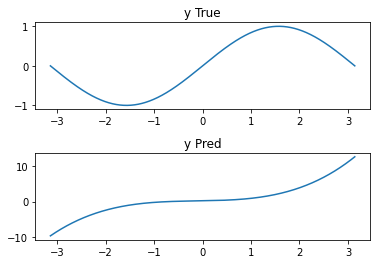

In [9]:
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2, 1, 1)
plt.title('y True')
plt.plot(X, y)

plt.subplot(2, 1, 2)
plt.title('y Pred')
plt.plot(X, y_random)
plt.show()

#### 가중치 학습

In [10]:
lr = 1e-6

In [11]:
for epoch in range(2000) :
    
    y_pred = a * X ** 3 + b * X ** 2 + c * X + d
    
    loss = (y_pred - y).pow(2).sum().item() # 손실 정의
    
    if epoch % 100 == 0 :
        print(f'Epoch {epoch + 1} Loss = {loss}')
        
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * X ** 3).sum()
    grad_b = (grad_y_pred * X ** 2).sum()
    grad_c = (grad_y_pred * X).sum()
    grad_d = grad_y_pred.sum()
    
    a -= lr * grad_a
    b -= lr * grad_b
    c -= lr * grad_c
    d -= lr * grad_d

Epoch 1 Loss = 16933.2265625
Epoch 101 Loss = 212.16331481933594
Epoch 201 Loss = 173.64373779296875
Epoch 301 Loss = 142.37722778320312
Epoch 401 Loss = 116.89738464355469
Epoch 501 Loss = 96.13169860839844
Epoch 601 Loss = 79.20661926269531
Epoch 701 Loss = 65.41093444824219
Epoch 801 Loss = 54.16498947143555
Epoch 901 Loss = 44.99684143066406
Epoch 1001 Loss = 37.521888732910156
Epoch 1101 Loss = 31.42694091796875
Epoch 1201 Loss = 26.45676040649414
Epoch 1301 Loss = 22.40346908569336
Epoch 1401 Loss = 19.09761619567871
Epoch 1501 Loss = 16.401050567626953
Epoch 1601 Loss = 14.201268196105957
Epoch 1701 Loss = 12.406569480895996
Epoch 1801 Loss = 10.942203521728516
Epoch 1901 Loss = 9.7472505569458


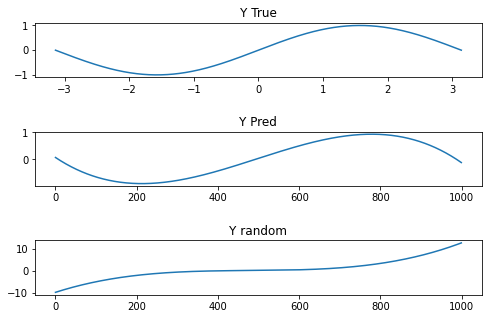

In [12]:
plt.figure(figsize = (8, 5))
plt.subplots_adjust(hspace = 1)

plt.subplot(3, 1, 1)
plt.title('Y True')
plt.plot(X, y)

plt.subplot(3, 1, 2)
plt.title('Y Pred')
plt.plot(y_pred)

plt.subplot(3, 1, 3)
plt.title('Y random')
plt.plot(y_random)

plt.show()

***
### 보스턴 집값

In [13]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [44]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim

In [16]:
model = nn.Sequential(
nn.Linear(13, 64),
nn.ReLU(),
nn.Linear(64, 1)
)

In [17]:
X = boston.data

In [18]:
Y = boston.target

In [19]:
BATCH_SIZE = 32
lr = 0.001

In [20]:
optim = optim.Adam(model.parameters(), lr = lr)

In [21]:
for epoch in range(200) :
    
    for i in range(len(X) // BATCH_SIZE) :
        start = i * BATCH_SIZE
        end = start + BATCH_SIZE
        
        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(Y[start:end])
        
        optim.zero_grad() # 가중치 기울기 0으로 초기화
        pred = model(x) # 모델 예측값 계산
        loss = nn.MSELoss()(pred, y) # MSE loss 계산
        loss.backward() # 오차 역전파
        optim.step() # 최적화 진행
        
    if epoch % 20 == 0 :
        print(f"Epoch {epoch + 1} loss : {loss.item()}")

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 loss : 2518.008056640625
Epoch 21 loss : 18.284887313842773
Epoch 41 loss : 17.26927375793457
Epoch 61 loss : 16.886146545410156
Epoch 81 loss : 16.58161163330078
Epoch 101 loss : 16.8808650970459
Epoch 121 loss : 16.795141220092773
Epoch 141 loss : 16.990642547607422
Epoch 161 loss : 17.069250106811523
Epoch 181 loss : 16.86769676208496


In [22]:
pred = model(torch.FloatTensor(X[0, :13]))

In [23]:
pred.item()

29.795284271240234

In [24]:
Y[0]

24.0

***
### 다중분류

In [25]:
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

In [26]:
train = MNIST(root = "./", train = True, download = True, transform = ToTensor())
test = MNIST(root = "./", train = False, download = True, transform = ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [27]:
len(train), len(test)

(60000, 10000)

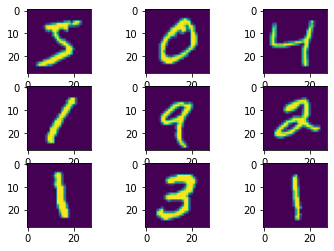

In [28]:
for i in range(9) :
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(train.data[i])
plt.show()

In [29]:
from torch.utils.data.dataloader import DataLoader

DataLoader는 학습에 사용할 배치를 자동으로 반환한다.

In [30]:
tr_loader = DataLoader(train, batch_size = 128, shuffle = True)

In [33]:
te_loader = DataLoader(test, batch_size = 128, shuffle = False)

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
device

'cuda'

In [36]:
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [38]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [39]:
lr = 0.003

In [ ]:
import torch.optim as optim

In [45]:
optim = optim.Adam(model.parameters(), lr = lr)

In [46]:
for epoch in range(20) :

  for data, label in tr_loader :

    optim.zero_grad()

    data = torch.reshape(data, (-1, 784)).to(device)
    pred = model(data)

    loss = nn.CrossEntropyLoss()(pred, label.to(device))
    loss.backward()
    optim.step()

  print(f"Epoch {epoch + 1} loss : {loss.item()}")

torch.save(model.state_dict(), 'MNIST.pth') # 파이토치 모델은 .pth 확장자로 저장된다.

Epoch 1 loss : 0.0867369994521141
Epoch 2 loss : 0.25935009121894836
Epoch 3 loss : 0.14997614920139313
Epoch 4 loss : 0.10324717313051224
Epoch 5 loss : 0.03188369795680046
Epoch 6 loss : 0.068479023873806
Epoch 7 loss : 0.01455641258507967
Epoch 8 loss : 0.08398818224668503
Epoch 9 loss : 0.06702078133821487
Epoch 10 loss : 0.07285608351230621
Epoch 11 loss : 0.07493338733911514
Epoch 12 loss : 0.004643510561436415
Epoch 13 loss : 0.025990189984440804
Epoch 14 loss : 0.03803001344203949
Epoch 15 loss : 0.02115769125521183
Epoch 16 loss : 0.023277955129742622
Epoch 17 loss : 0.008384176529943943
Epoch 18 loss : 0.00927628856152296
Epoch 19 loss : 0.005729580298066139
Epoch 20 loss : 0.05705287680029869


In [47]:
model.load_state_dict(torch.load('MNIST.pth', map_location = device))

<All keys matched successfully>

In [48]:
acc = 0

In [49]:
with torch.no_grad() : # no_grad는 기울기를 계산하지 않는다. 평가 단계에서는 가중치를 업데이트 하지 않기 때문
  for data, label in te_loader :

    data = torch.reshape(data, (-1, 784)).to(device)

    output = model(data)
    pred = output.data.max(1)[1] # max() 안에 숫자는 axis를 의미

    correct = pred.eq(label.to(device).data).sum().item() # eq는 값이 같으면 1 다르면 0을 반환
    acc += correct

In [62]:
print(f"Accuracy : {acc / len(test)}")

Accuracy : 0.9702
